# Binary Search Tree

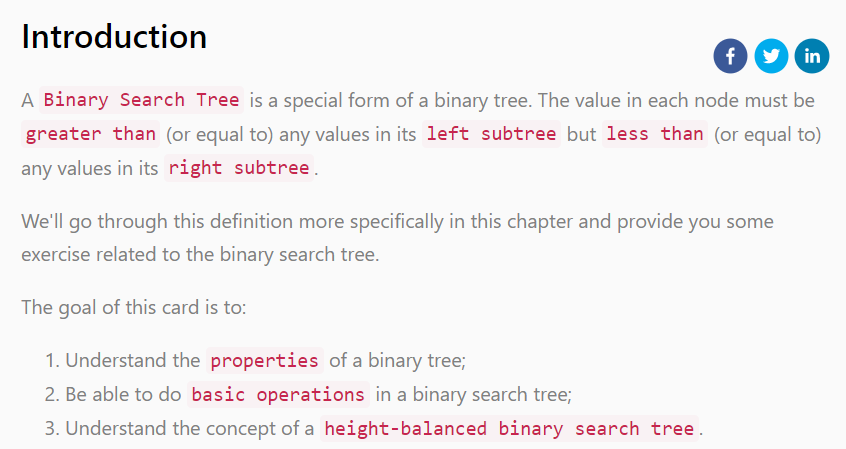

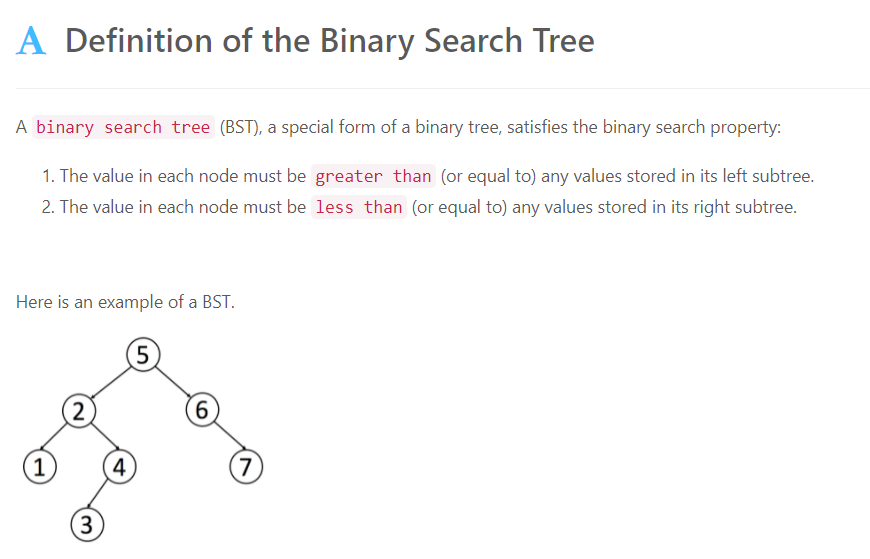

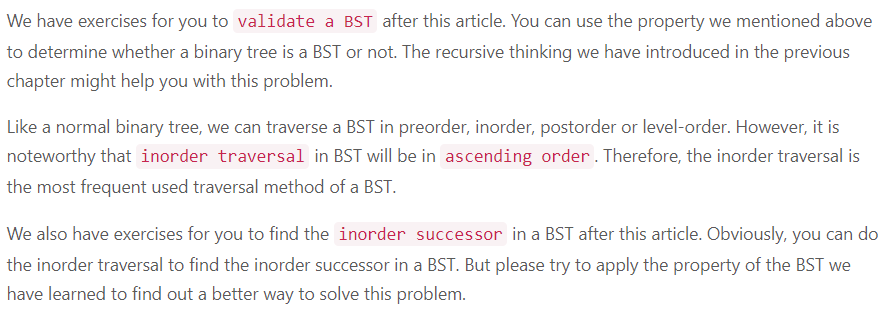

## Validate Binary Search Tree

https://leetcode.com/explore/learn/card/introduction-to-data-structure-binary-search-tree/140/introduction-to-a-bst/997/

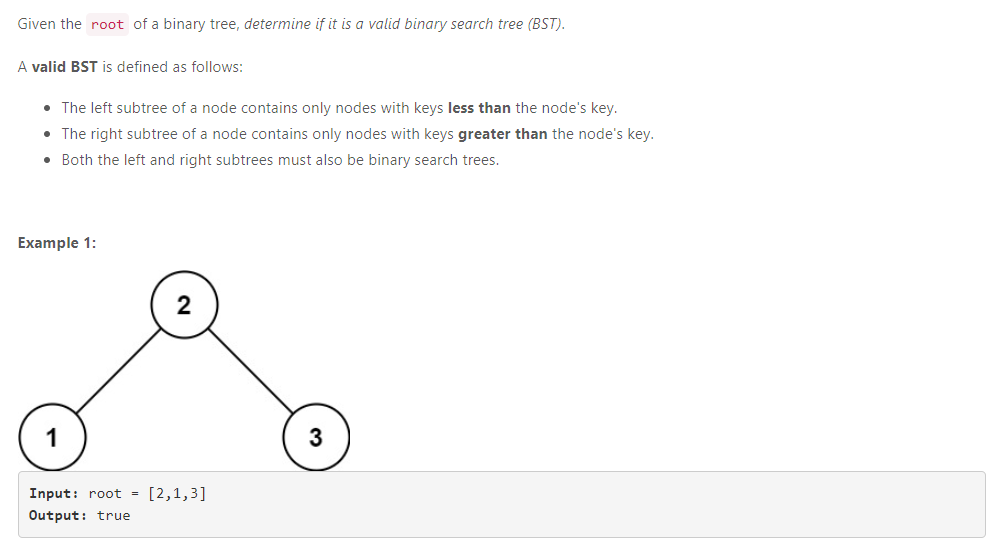

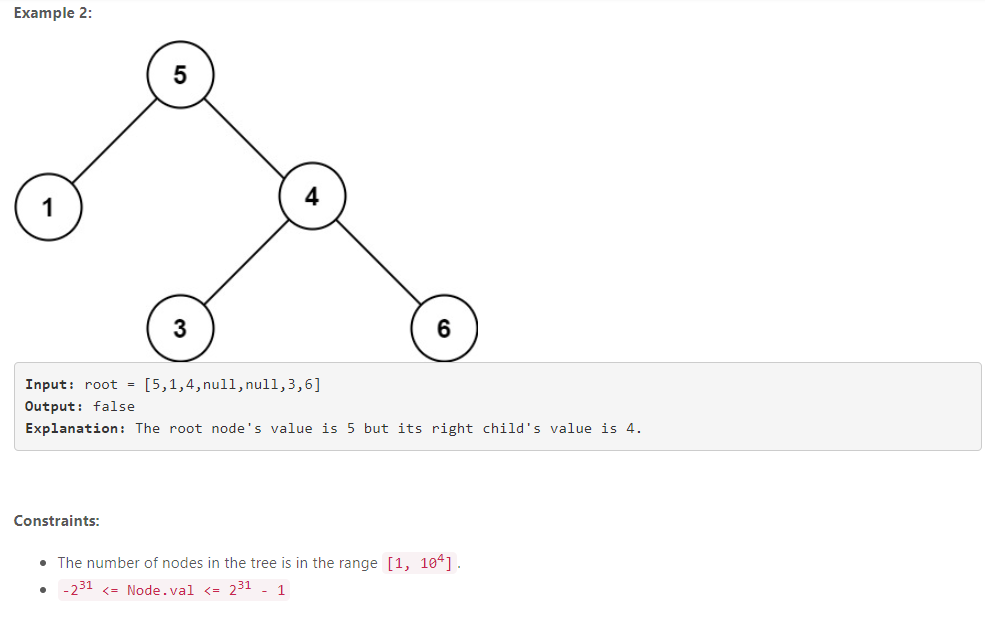

In [ ]:
# Python

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
        
        
    def validate(self, root, low = -math.inf, high = math.inf):
        if not root:
            return True
        
        if root.val <= low or root.val >= high:
            return False
        
        return self.validate(root.left, low, root.val) and self.validate(root.right, root.val, high)
        
        
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        return self.validate(root)
        
        

##### Failed V1 
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    bool helper(TreeNode* root, int left_max ,int right_min){
        cout<<root->val<<" root->val\n";
        cout<<left_max<<" left_min\n";
        cout<<right_min<<" right_max\n";
        cout<<" \n";
        
        if(!root){
            return true;
        }
        
        if(root->left){        
            if(root->left->right and root->left->right->val >= left_max){
                // cout<<" tata\n";
                return false;
            }
            
            if(root->left->left and root->left->left->val >= left_max){
                // cout<<" tata\n";
                return false;
            }
            
            if( root->left->val<left_max){
                cout<<" left tata\n";
                left_max = root->left->val;
                if(!root->right){
                    right_min = root->left->val;
                }
                
            }
            
            if(root->left->val>=root->val){
                return false;
            }else if(!helper(root->left, left_max, right_min)){
                return false;
            } 
        }else{
            right_min = root->val;
        }
        
        if(root->right){
            
            if(root->right->left and root->right->left->val <= right_min){
                return false;
            }
            
            if(root->right->right and root->right->right->val <= right_min){
                return false;
            }

            if(root->right->val>right_min){
                cout<<" right tata\n";
                right_min = root->right->val;
                if(!root->left){
                    left_max = root->right->val;
                }
            }

            if(root->right->val<=root->val){
                return false;
            }else if(!helper(root->right, left_max, right_min)){
                return false;
            } 
        }else{
            left_max = root->val;
        }

        return true;
    }
    
    
    bool isValidBST(TreeNode* root) {
        return helper(root, root->val, root->val);
    }
};

```

##### Failed v2
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    vector<int> helper(TreeNode* cur, int min_val, int max_val){
        cout<<min_val<<" min_val\n";
        cout<<max_val<<" max_val\n";
        
        vector<int> tmp(2);
        if(!cur->left and !cur->right){
            tmp[0] = min(min_val,cur->val);
            tmp[1] = max(max_val,cur->val);
            return tmp;
        }
        

        if(cur->left){
            tmp = helper(cur->left, min_val, max_val);
            if(tmp[0]<min_val){
                min_val = tmp[0];
            }
            if(tmp[1]>max_val){
                max_val = tmp[1];
            }
        }
        
        if(cur->right){
            tmp = helper(cur->right, min_val, max_val);
            if(tmp[0]<min_val){
                min_val = tmp[0];
            }
            if(tmp[1]>max_val){
                max_val = tmp[1];
            }
        }

        tmp[0] = min_val;
        tmp[1] = max_val;
        return tmp;
    }
    
    
    bool isValidBST(TreeNode* root) {
        
        vector<int> tmp = helper(root, INT_MAX, 0);
        
        cout<<tmp[0]<<" min_val\n";
        cout<<tmp[1]<<" max_val\n";
        return false;
    }
};
```

##### v3 Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    vector<int> helper(TreeNode* cur, int min_val, int max_val, map<TreeNode*, vector<int>>& cache){
        // cout<<min_val<<" min_val\n";
        // cout<<max_val<<" max_val\n";

        if(cache.find(cur)!=cache.end()){
            return cache[cur];
        }
        
        vector<int> tmp(2);
        min_val = min(min_val,cur->val);
        max_val = max(max_val,cur->val);
        
        if(!cur->left and !cur->right){
            tmp[0]=min_val;
            tmp[1] = max_val;
            return tmp;
        }
        

        if(cur->left){
            tmp = helper(cur->left, min_val, max_val, cache);
            if(tmp[0]<min_val){
                min_val = tmp[0];
            }
            if(tmp[1]>max_val){
                max_val = tmp[1];
            }
        }
        
        if(cur->right){
            tmp = helper(cur->right, min_val, max_val, cache);
            if(tmp[0]<min_val){
                min_val = tmp[0];
            }
            if(tmp[1]>max_val){
                max_val = tmp[1];
            }
        }

        tmp[0] = min_val;
        tmp[1] = max_val;
        return tmp;
    }
    
    
    bool checker(TreeNode* cur, map<TreeNode*,vector<int>>& cache){
        vector<int> tmp(2);
        if(!cur){
            return true;
        }
        
        if(!cur->left and !cur->right){
            return true;
        }
        
        
        
        if(cur->left){
           tmp = helper(cur->left, INT_MAX, -INT_MAX-1, cache);
            if(cur->val<=tmp[1]){
                return false;
            }
        }
        
        if(cur->right){
           tmp = helper(cur->right, INT_MAX, -INT_MAX-1, cache);
            if(cur->val>=tmp[0]){
                return false;
            } 
        }
        return checker(cur->left, cache) and checker(cur->right, cache);
        
    }
    
    
    bool isValidBST(TreeNode* root) {
        map<TreeNode*, vector<int>> cache;
        
        cout<<INT_MAX<<" INT_MAX\n";
        cout<<-INT_MAX-1<<" -INT_MAX\n";
        vector<int> tmp = helper(root, INT_MAX, -INT_MAX-1, cache);
        
        return checker(root, cache);
        
        // cout<<tmp[0]<<" min_val\n";
        // cout<<tmp[1]<<" max_val\n";
        // return false;
    }
};

```

### Solutions
https://leetcode.com/problems/validate-binary-search-tree/solution/

##### Tree definition
```cpp
struct TreeNode {
    int val;
    TreeNode* left;
    TreeNode* right;
};
```

##### Approach 1: Recursive Traversal with Valid Range
```cpp
class Solution {
public:
    bool validate(TreeNode* root, TreeNode* low, TreeNode* high) {
        // Empty trees are valid BSTs.
        if (root == nullptr) {
            return true;
        }

        // The current node's value must be between low and high.
        if ((low != nullptr and root->val <= low->val) or
            (high != nullptr and root->val >= high->val)) {
            return false;
        }

        // The left and right subtree must also be valid.
        return validate(root->right, root, high) and
               validate(root->left, low, root);
    }

    bool isValidBST(TreeNode* root) {
        return validate(root, nullptr, nullptr);
    }
};
```

##### Approach 2: Iterative Traversal with Valid Range
```cpp
class Solution {
private:
    stack<TreeNode*> stk, lower_limits, upper_limits;

public:
    void update(TreeNode* root, TreeNode* low, TreeNode* high) {
        stk.push(root);
        lower_limits.push(low);
        upper_limits.push(high);
    }
    bool isValidBST(TreeNode* root) {
        TreeNode* low = nullptr;
        TreeNode* high = nullptr;
        update(root, low, high);

        while (!stk.empty()) {
            root = stk.top();
            stk.pop();
            low = lower_limits.top();
            lower_limits.pop();
            high = upper_limits.top();
            upper_limits.pop();

            if (root == nullptr) {
                continue;
            }

            TreeNode* val_node = root;
            if (low != nullptr and val_node->val <= low->val) {
                return false;
            }
            if (high != nullptr and val_node->val >= high->val) {
                return false;
            }
            update(root->right, val_node, high);
            update(root->left, low, val_node);
        }
        return true;
    }
};
```

##### Approach 3: Recursive Inorder Traversal
```cpp
class Solution {
private:
    TreeNode* prev = nullptr;

public:
    bool isValidBST(TreeNode* root) {
        return inorder(root);
    }

    bool inorder(TreeNode* root) {
        if (root == nullptr) {
            return true;
        }
        if (!inorder(root->left)) {
            return false;
        }
        if (prev != nullptr && root->val <= prev->val) {
            return false;
        }
        prev = root;
        return inorder(root->right);
    }
};
```

##### Approach 4: Iterative Inorder Traversal
```cpp
class Solution {
public:
    bool isValidBST(TreeNode* root) {
        stack<TreeNode*> stk;
        TreeNode* prev = nullptr;

        while (!stk.empty() or root != nullptr) {
            while (root != nullptr) {
                stk.push(root);
                root = root->left;
            }
            root = stk.top();
            stk.pop();

            // If next element in inorder traversal
            // is smaller than the previous one
            // that's not BST.
            if (prev != nullptr and root->val <= prev->val) {
                return false;
            }
            prev = root;
            root = root->right;
        }
        return true;
    }
};
```

## Inorder Successor in BST

https://leetcode.com/explore/learn/card/introduction-to-data-structure-binary-search-tree/140/introduction-to-a-bst/998/

Given the root of a binary search tree and a node p in it, return the in-order successor of that node in the BST. If the given node has no in-order successor in the tree, return null.

The successor of a node p is the node with the smallest key greater than p.val.

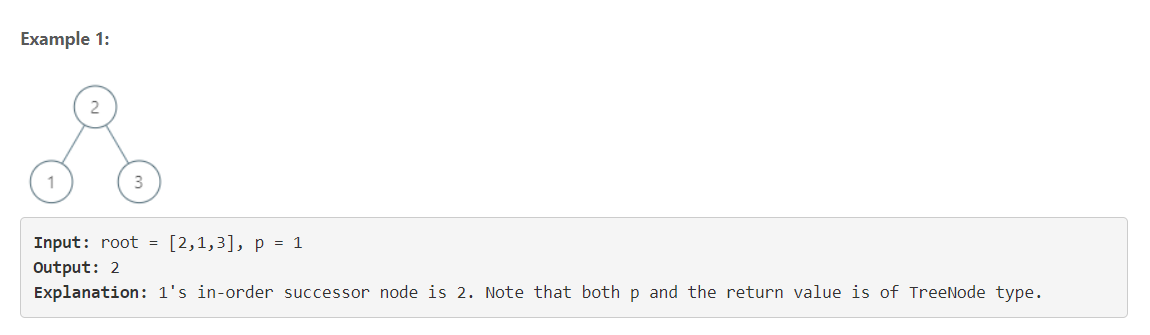

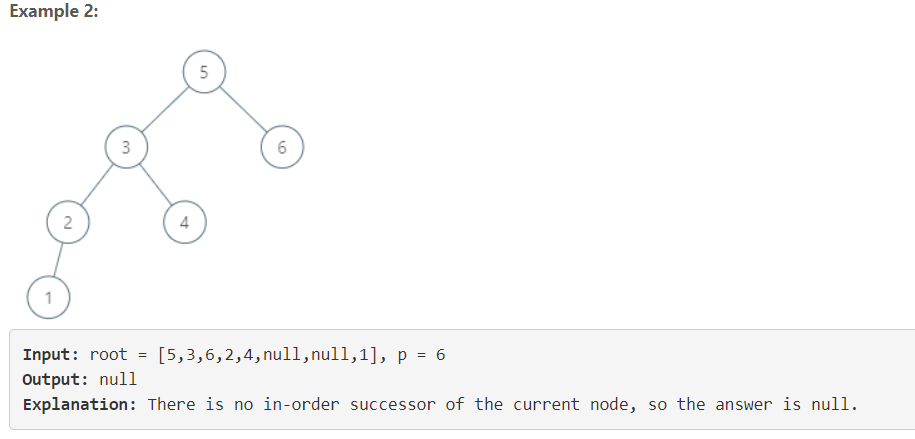

In [ ]:
# Python

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def inorderSuccessor(self, root: 'TreeNode', p: 'TreeNode') -> 'Optional[TreeNode]':
        res = []
        self.helper(root, res);
        
        for i,x in enumerate(res):
            if x.val==p.val:
                break
        
        if i+1 < len(res):
            return res[i+1]
        else:
            return None
    

    def helper(self, root, res):
        if root :
            self.helper(root.left, res);
            res.append(root);
            self.helper(root.right, res);
        

In [ ]:
class Solution:
    
    def inorderSuccessor(self, root: 'TreeNode', p: 'TreeNode') -> 'TreeNode':
        
        successor = None
        
        while root:
            if p.val >= root.val:
                root = root.right
            else:
                successor = root
                root = root.left
                
        return successor

##### Accepted Brute Force
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    
    
    vector<TreeNode*> inorderTraversal(TreeNode* root) {
        stack<TreeNode*> s;
        vector<TreeNode*> v;
        TreeNode* cur = root;
        while(cur != NULL or s.size()!=0){
            while(cur != NULL){
                s.push(cur);
                cur = cur->left;
            }
            cur = s.top();
            v.push_back(cur); 
            s.pop();  // 这里这个值被直接抽调了  所以不会影响  巧
            cur = cur->right;

        }
    return v;
    }
    
    
    
    
    TreeNode* inorderSuccessor(TreeNode* root, TreeNode* p) {
        vector<TreeNode*> v = inorderTraversal(root);
        int i=0;
        for(i;i<v.size();i++){
            if(v[i]==p){
                break;
            }
        }
        if(i==v.size()-1){
            return NULL;
        }else{
            return v[i+1];
        }
    }
};
```

##### V2 Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    TreeNode* inorderTraversal(TreeNode* root, TreeNode* p) {
        stack<TreeNode*> s;
        TreeNode* cur = root;
        while(cur != NULL or s.size()!=0){
            while(cur != NULL){
                s.push(cur);
                cur = cur->left;
            }
            cur = s.top();
            s.pop();  // 这里这个值被直接抽调了  所以不会影响  巧
            if(cur == p){
                break;
            }
            cur = cur->right;
        }
        
        cur = cur->right;

        
        if(!cur and s.size()==0){
            return NULL;
        }
        
        while(cur!=NULL){
            s.push(cur);
            cur = cur->left;
        }
        cur = s.top();

    return cur;
    }

    TreeNode* inorderSuccessor(TreeNode* root, TreeNode* p) {
        return inorderTraversal(root, p);

    }
};
```

### Solutions
https://leetcode.com/problems/inorder-successor-in-bst/solution/


##### <font color="red"> Check later!!! </font>



##### Approach 1: Without using BST properties

![image.png](attachment:image.png)

```java
class Solution {
    
    private TreeNode previous;
    private TreeNode inorderSuccessorNode;
    
    public TreeNode inorderSuccessor(TreeNode root, TreeNode p) {
        
        // Case 1: We simply need to find the leftmost node in the subtree rooted at p.right.
        if (p.right != null) {
            
            TreeNode leftmost = p.right;
            
            while (leftmost.left != null) {
                leftmost = leftmost.left;
            }
            
            this.inorderSuccessorNode = leftmost;
        } else {
            
            // Case 2: We need to perform the standard inorder traversal and keep track of the previous node.
            this.inorderCase2(root, p);
        }
        
        return this.inorderSuccessorNode;
    }
    
    private void inorderCase2(TreeNode node, TreeNode p) {
        
        if (node == null) {
            return;
        }
        
        // Recurse on the left side
        this.inorderCase2(node.left, p);
        
        // Check if previous is the inorder predecessor of node
        if (this.previous == p && this.inorderSuccessorNode == null) {
            this.inorderSuccessorNode = node;
            return;
        }
        
        // Keeping previous up-to-date for further recursions
        this.previous = node;
        
        // Recurse on the right side
        this.inorderCase2(node.right, p);
    }
}
```

##### Approach 2: Using BST properties
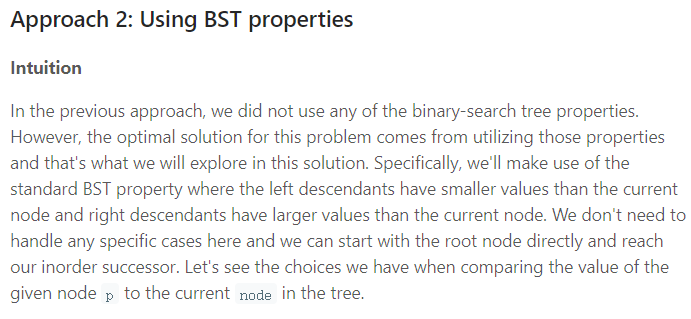

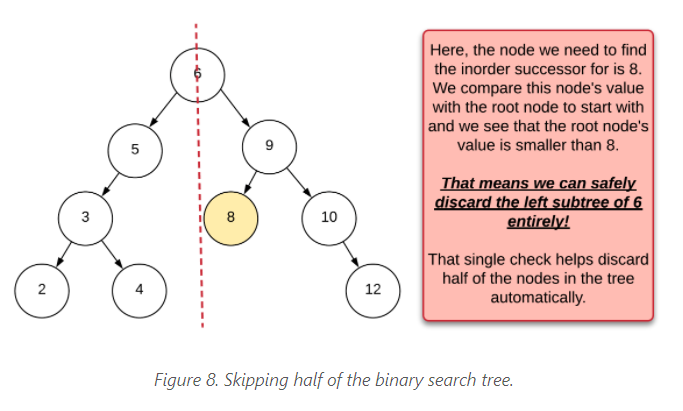

```java
class Solution {
    
    public TreeNode inorderSuccessor(TreeNode root, TreeNode p) {
        
        TreeNode successor = null;
        
        while (root != null) {
            
            if (p.val >= root.val) {
                root = root.right;
            } else {
                successor = root;
                root = root.left;
            }
        }
        
        return successor;
    }
}
```

## Binary Search Tree Iterator
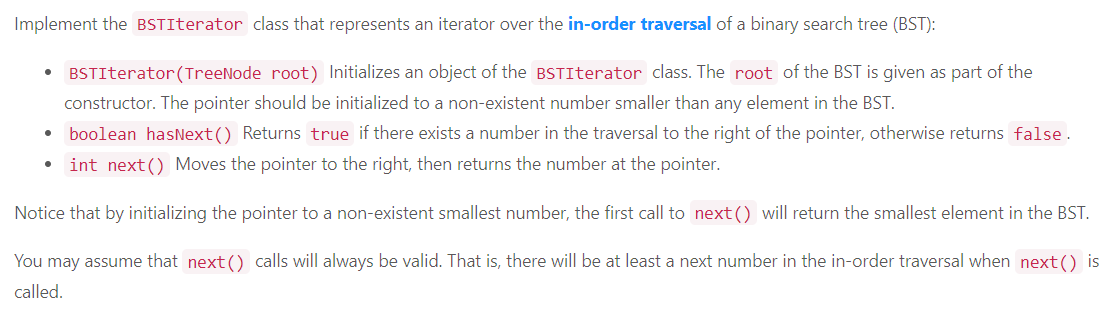

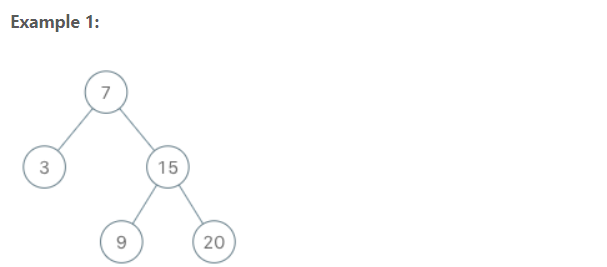

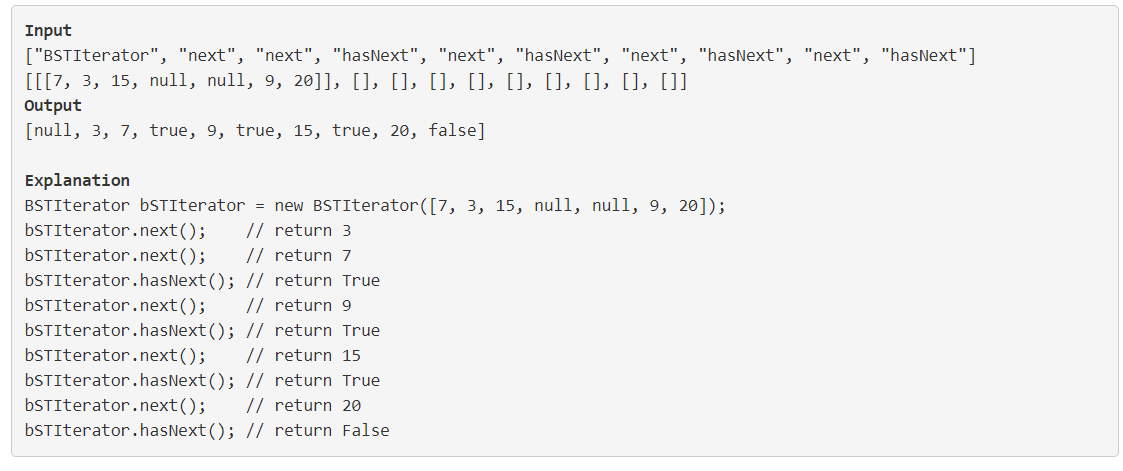

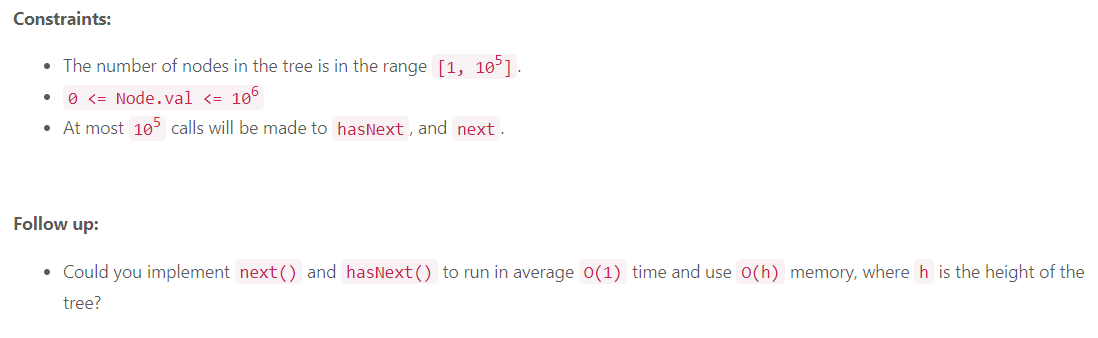

In [ ]:
# Pre-Order Solution

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class BSTIterator:

    def __init__(self, root: Optional[TreeNode]):
        self.root = root
        self.stack = [self.root,]

        
    def next(self) -> int:
                           
        cur = self.stack.pop()
        if cur.right:
            self.stack.append(cur.right)
        
        successor = cur.left
        while (successor):
            self.stack.append(successor);
            successor = successor.left;

        return cur.val

    def hasNext(self) -> bool:
        return len(self.stack) > 0


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()

In [ ]:
# InOrder Solution

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class BSTIterator:
    def __init__(self, root: Optional[TreeNode]):               
        self.root = root
        self.stack = [self.root,]
        self.visited = set()

    def next(self) -> int:    
        cur = self.stack[-1]
        
        successor = cur.left
        while (successor and not successor in self.visited):
            self.stack.append(successor)
            self.visited.add(successor)
            successor = successor.left;
           
        cur = self.stack[-1]
        if (not cur.left) or (cur.left in self.visited):
            self.stack.pop()
            if cur.right:
                self.stack.append(cur.right)
        
        # print([x.val for x in self.stack])
        return cur.val

    def hasNext(self) -> bool:
        return len(self.stack) > 0

# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()

In [ ]:
# Solutions


# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class BSTIterator:

    def __init__(self, root: TreeNode):

        # Array containing all the nodes in the sorted order
        self.nodes_sorted = []

        # Pointer to the next smallest element in the BST
        self.index = -1

        # Call to flatten the input binary search tree
        self._inorder(root)

    def _inorder(self, root):
        if not root:
            return
        self._inorder(root.left)
        self.nodes_sorted.append(root.val)
        self._inorder(root.right)

    def next(self) -> int:
        """
        @return the next smallest number
        """
        self.index += 1
        return self.nodes_sorted[self.index]

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        return self.index + 1 < len(self.nodes_sorted)

In [ ]:
# Sloution2  II

Approach 2: Controlled Recursion

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class BSTIterator:

    def __init__(self, root: TreeNode):

        # Stack for the recursion simulation
        self.stack = []

        # Remember that the algorithm starts with a call to the helper function
        # with the root node as the input
        self._leftmost_inorder(root)

    def _leftmost_inorder(self, root):

        # For a given node, add all the elements in the leftmost branch of the tree
        # under it to the stack.
        while root:
            self.stack.append(root)
            root = root.left

    def next(self) -> int:
        """
        @return the next smallest number
        """

        # Node at the top of the stack is the next smallest element
        topmost_node = self.stack.pop()

        # Need to maintain the invariant. If the node has a right child, call the
        # helper function for the right child
        if topmost_node.right:
            self._leftmost_inorder(topmost_node.right)
        return topmost_node.val

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        return len(self.stack) > 0

##### Accpeted v1
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class BSTIterator {
public:
    
    stack<TreeNode*> s;
    TreeNode* cur;
    
    
    
    BSTIterator(TreeNode* root) {
        cur = root;
    }
    
    int next() {
        while(cur != NULL or s.size()!=0){
            while(cur != NULL){
                s.push(cur);
                cur = cur->left;
            }
            cur = s.top();
            s.pop();  // 这里这个值被直接抽调了  所以不会影响  巧
            break;
            // cur = cur->right;
        }

        
        int tmp = cur->val;
        cur = cur->right;
        return tmp;
        
    }
    
    bool hasNext() {
        if(cur !=NULL or s.size()!=0){
            return true;
        }else{
            return false;
        }
    }
};

/**
 * Your BSTIterator object will be instantiated and called as such:
 * BSTIterator* obj = new BSTIterator(root);
 * int param_1 = obj->next();
 * bool param_2 = obj->hasNext();
 */
```

### Solution
https://leetcode.com/problems/binary-search-tree-iterator/solution/

##### Approach 1: Flattening the BST
```java
/**
 * Definition for a binary tree node.
 * public class TreeNode {
 * int val;
 * TreeNode left;
 * TreeNode right;
 * TreeNode(int x) { val = x; }
 * }
 */
class BSTIterator {

    ArrayList<Integer> nodesSorted;
    int index;

    public BSTIterator(TreeNode root) {

        // Array containing all the nodes in the sorted order
        this.nodesSorted = new ArrayList<Integer>();

        // Pointer to the next smallest element in the BST
        this.index = -1;

        // Call to flatten the input binary search tree
        this._inorder(root);
    }

    private void _inorder(TreeNode root) {

        if (root == null) {
            return;
        }

        this._inorder(root.left);
        this.nodesSorted.add(root.val);
        this._inorder(root.right);
    }

    /**
     * @return the next smallest number
     */
    public int next() {
        return this.nodesSorted.get(++this.index);
    }

    /**
     * @return whether we have a next smallest number
     */
    public boolean hasNext() {
        return this.index + 1 < this.nodesSorted.size();
    }
}
```

##### Approach 2: Controlled Recursion
```java

/**
 * Definition for a binary tree node.
 * public class TreeNode {
 * int val;
 * TreeNode left;
 * TreeNode right;
 * TreeNode(int x) { val = x; }
 * }
 */
class BSTIterator {

    Stack<TreeNode> stack;

    public BSTIterator(TreeNode root) {

        // Stack for the recursion simulation
        this.stack = new Stack<TreeNode>();

        // Remember that the algorithm starts with a call to the helper function
        // with the root node as the input
        this._leftmostInorder(root);
    }

    private void _leftmostInorder(TreeNode root) {

        // For a given node, add all the elements in the leftmost branch of the tree
        // under it to the stack.
        while (root != null) {
            this.stack.push(root);
            root = root.left;
        }
    }

    /**
     * @return the next smallest number
     */
    public int next() {
        // Node at the top of the stack is the next smallest element
        TreeNode topmostNode = this.stack.pop();

        // Need to maintain the invariant. If the node has a right child, call the
        // helper function for the right child
        if (topmostNode.right != null) {
            this._leftmostInorder(topmostNode.right);
        }

        return topmostNode.val;
    }

    /**
     * @return whether we have a next smallest number
     */
    public boolean hasNext() {
        return this.stack.size() > 0;
    }
}

```